In [ ]:
import cv2 as cv
import numpy as np
import os
from google.colab.patches import cv2_imshow

## Creating Dataset using Face Detection

In [ ]:
people = ['Adithi Rao','Amber Heard','Ben Affleck','Henry Cavill','Tammu']
DIR = 'drive/My Drive/Faces'
haar_cascade = cv.CascadeClassifier('drive/My Drive/Colab Notebooks/harCascade.xml')

In [ ]:
features = []
lables = []

In [ ]:
def create_train(scalingFactor,minNeighbors):
  for person in people:
    path = os.path.join(DIR,person)
    label = people.index(person)
    for img in os.listdir(path):
      img_path = os.path.join(path,img)
      
      img_array = cv.imread(img_path)
      gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)

      faces_rect =  haar_cascade.detectMultiScale(gray,scalingFactor,minNeighbors)
      
      for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h,x:x+w]
        features.append(faces_roi)
        lables.append(label)



In [ ]:
create_train(1.1,4)
print(f'length of features: {len(features)}')
print(f'length of labels: {len(lables)}')

length of features: 137
length of labels: 137


## Converting Feature and Labels to numpy arrays

In [ ]:
features = np.array(features,dtype='object')
labels = np.array(lables)

### Training Face Recogniazer

In [ ]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [ ]:
face_recognizer.train(features,labels)

### Saving the Input Features and Labels as Numpy arrays

In [ ]:
np.save('feature.npy',features)
np.save('labels.npy',labels)

### Saving Face Recognizer

In [ ]:
face_recognizer.save('face_trained.yml')

### Face Recognition Prediction

#### Loading Inputs/Outputs and Face Recognition Model

In [ ]:
people = ['Adithi Rao','Amber Heard','Ben Affleck','Henry Cavill','Tammu']
features = np.load('feature.npy',allow_pickle=True)
labels = np.load('labels.npy',allow_pickle=True)

In [ ]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

In [ ]:
DIR = 'drive/My Drive/Faces'
img = cv.imread(os.path.join(DIR,'Tammu4.jpg'))
#DIR = 'drive/My Drive/Faces/Tammu' 
#img = cv.imread(os.path.join(DIR,'blogtouch_picture_9fb34ceb_1dcc_8094_caa6_3c01d5ec47e5.jpg'))

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
face_rect = haar_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in face_rect:
  faces_roi = gray[y:y+h,x:x+w]
  label, confidence = face_recognizer.predict(faces_roi)
  print(f'{people[label]} with a Confidence of {confidence}')
  cv.putText(img,str(people[label]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
  cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

Adithi Rao with a Confidence of 83.21656602950522


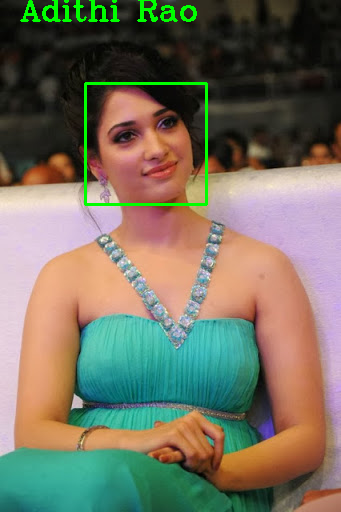

In [ ]:
cv2_imshow(img)